
Tarea práctica 6 - Análisis Numérico

Edison Santiago Tutalcha Bastidas

Código: 1927038-3147

### **Ejercicio Práctico** 

- Repetir el ejercicio visto en clase usando el metodo de Runge-Kutta 4 y comparar con el metodo de Euler.


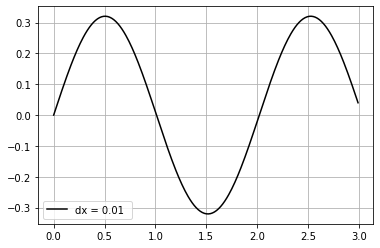

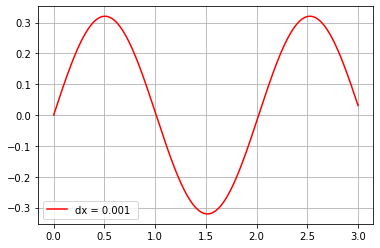

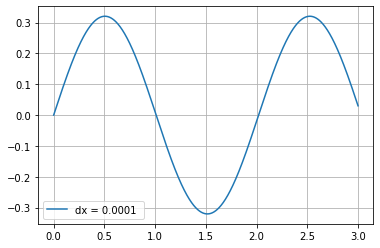

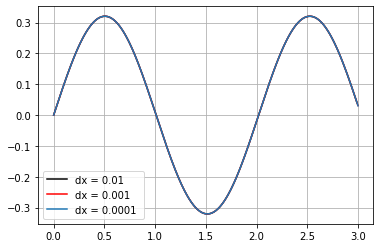

In [4]:
import matplotlib.pyplot as plt            
import numpy as np

g=9.8                  #Definimos las variables globales
L=1

def sisEDO(x,x_0):                
  dthetadt=x_0[1]                  #Definimos la variación de theta y omega (velocidad angular)
  dwdt=-(g/L)*np.sin(x_0[0])              
  return np.array( [dthetadt ,dwdt] )              #La función va a retornar las variaciones de cada una de las varibles

# Definimos las condiciones iniciales del sistema 

theta_0=0                                       
omega_0=1                                         


# Configuramos las variables correspondientes al paso, su tamaño para así definir correctamente los dominios de cada variable.

dx = 0.01                                 
x=np.arange(0, 3, dx)                       

dx2 = 0.001                       
x2=np.arange(0, 3, dx2)                

dx3 = 0.0001          
x3=np.arange(0, 3, dx3)                          

# Realizamos un conteo de la cantidad de pasos para cada variable 
# (puntos del dominio configurados previamente)

N_pasos = len(x)                                  
N2_pasos = len(x2)                              
N3_pasos = len(x3)                               

# Inicializamos las matrices donde se compilaran las soluciones, 
# Dado que se debe solucionar dos sistemas, los dos datos por cada paso son 2*(cantidad de pasos)

x_0 = np.zeros((2,N_pasos))                      
x_02 = np.zeros((2,N2_pasos))                 
x_03 = np.zeros((2,N3_pasos))                


# Definimos sobre las matrices de soluciones, los valores iniciales en la primera columna

x_0[0,0] = theta_0
x_0[1,0] = omega_0

x_02[0,0] = theta_0
x_02[1,0] = omega_0

x_03[0,0] = theta_0
x_03[1,0] = omega_0
 
# Programamos el método de Runge Kutta 4

for i in range( N_pasos-1 ):                                   # Generamos un ciclo con la cantidad de pasos que faltan para llenar todo el dominio 
    
    k1= dx * sisEDO(x[i], x_0[:,i])                            
    k2= dx * sisEDO(x[i]+dx/2, x_0[:,i]+(1/2)*k1)             
    k3= dx * sisEDO(x[i]+dx/2, x_0[:,i]+(1/2)*k2)         
    k4= dx * sisEDO(x[i+1]+dx, x_0[:,i]+k3)                   

    x_0[:,i+1] = x_0[:,i] + (1/6)*(k1+(2*k2)+(2*k3)+k4)      # Añadimos cada solución en el paso i+1
     
# De manera análoga programamos los ciclos de cada una de las otras variables

for i in range( N2_pasos-1 ):                                 

    k1= dx2 * sisEDO(x2[i], x_02[:,i])                       
    k2= dx2 * sisEDO(x2[i]+dx2/2, x_02[:,i]+(1/2)*k1)        
    k3= dx2 * sisEDO(x2[i]+dx2/2, x_02[:,i]+(1/2)*k2)        
    k4= dx2 * sisEDO(x2[i+1]+dx2, x_02[:,i]+k3)           

    x_02[:,i+1] = x_02[:,i] + (1/6)*(k1+(2*k2)+(2*k3)+k4)   

for i in range( N3_pasos-1 ):                                 

    k1= dx3 * sisEDO(x3[i], x_03[:,i])                 
    k2= dx3 * sisEDO(x3[i]+dx3/2, x_03[:,i]+(1/2)*k1)          
    k3= dx3 * sisEDO(x3[i]+dx3/2, x_03[:,i]+(1/2)*k2)         
    k4= dx3 * sisEDO(x3[i+1]+dx3, x_03[:,i]+k3)            
    
    x_03[:,i+1] = x_03[:,i] + (1/6)*(k1+(2*k2)+(2*k3)+k4)   


# Configuramos el gráfico para cada variable con su configuración de paso 

plt.plot(x, x_0[0,:],'-0', label='dx = 0.01 ')
plt.grid()
plt.legend()
plt.show()

plt.plot(x2, x_02[0,:],'-r', label='dx = 0.001 ')
plt.grid()
plt.legend()
plt.show()

plt.plot(x3, x_03[0,:],'-', label='dx = 0.0001 ')
plt.grid()
plt.legend()
plt.show()    

# Pondremos las 3 gráficas juntas para comparar

plt.plot(x,   x_0[0,:],   '-0', label='dx = 0.01 ')
plt.plot(x2,  x_02[0,:],  '-r', label='dx = 0.001 ')
plt.plot(x3,  x_03[0,:],  '-', label='dx = 0.0001 ')

plt.grid()
plt.legend()
plt.show()


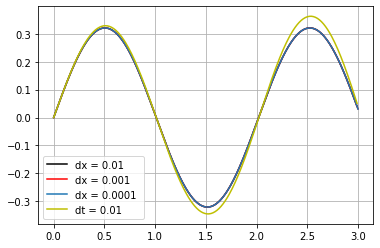

In [5]:
# Programaremos el método de Euler visto en clase 

import matplotlib.pyplot as plt
import numpy as np

g=9.8       # Establecemos las variables globales
L=1

def sis_EDO(t,u):

  dthetadt=u[1]               # Definimos la variación de theta y omega 
  dwdt=(-(g/L)*np.sin(u[0]))

  return np.array([dthetadt, dwdt])  # La funcion va a retornar las soluciones en un arreglo

theta0 = 0
omega0 = 1

dt = 0.01   # Definimos el tamaño de paso
t  = np.arange(0, 3, dt)

Ne_pasos = len(t) # Contamos los pasos que podemos tener en el dominio configurado
 
u = np.zeros( (2,Ne_pasos) ) # Inicializamos nuestra matriz de soluciones como una matriz de ceros

u[0,0] = theta0
u[1,0] = omega0  # Añadimos nuestros valores iniciales a la primer columna 

# Programamos el método de Euler

for i in range( Ne_pasos-1 ): 
    u[:,i+1] = u[:,i] + dt * sis_EDO(t[i] , u[:,i] )

# Graficaremos las soluciones de la EDO 

plt.plot(x,  x_0[0,:],  '-0', label='dx = 0.01 ')
plt.plot(x2, x_02[0,:], '-r', label='dx = 0.001 ')
plt.plot(x3, x_03[0,:], '-', label='dx = 0.0001 ')

plt.plot(t, u[0,:],'-y', label='dt = 0.01 ')
plt.grid()
plt.legend()
plt.show()

- Realizar test de convergencia para Runge-Kutta 4 y verificar que el error de truncamiento decrese según lo esperado.

<ipython-input-6-6a72e31ef1b9>:18: RuntimeWarning: divide by zero encountered in log2
  logE1=np.log2(E1)
<ipython-input-6-6a72e31ef1b9>:19: RuntimeWarning: divide by zero encountered in log2
  logE2=np.log2(E2)
<ipython-input-6-6a72e31ef1b9>:23: RuntimeWarning: invalid value encountered in subtract
  plt.plot(x,abs(logE2-logE1))         # Se ve que en este caso el error decrece, sin embargo, despues de intentar sacar los picos durante varias horas no dió el resultado que se esperaba con precisión.


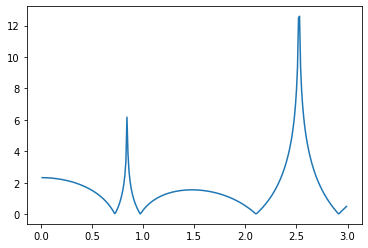

In [6]:
import matplotlib.pyplot as plt              
import numpy as np


E1= np.zeros(N_pasos)  # Definimos dos arreglos donde se compilará las diferencias de las soluciones de los dos métodos previamente calculados (Errores entre si) # La solucion X1 y X2
E2= np.zeros(N_pasos)  # Relacionaremos las soluciones de X2 y X3           


for i in range(N_pasos):       # En este ciclo empleamos la cantidad de elementos provenientes de RK4
  E1[i]=abs(x_02[0,2*i]-x_0[0,i])             # Añadimos la distancia entre el punto i-esimo de la primera solucion y el 2i-esimo de la segunda solucion (su correspondiente)

for i in range(N_pasos):       # En este ciclo empleamos la cantidad de elementos provenientes de RK4
  E2[i]=abs(x_03[0,4*i]-x_02[0,2*i])          # Añadimos a E2 la diferencia entre el punto 2i-esimo de la segunda solucion y el 4i-esimo de la tercera solucion

def log_2(x):
  return np.log2(x)

logE1=np.log2(E1)    
logE2=np.log2(E2)    

# Graficamos la función que representa nuestro error en escala logaritmica

plt.plot(x,abs(logE2-logE1))         # Se ve que en este caso el error decrece, sin embargo, despues de intentar sacar los picos durante varias horas no dió el resultado que se esperaba con precisión.
plt.show()   